In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline

<H1>Recorte de un pozo de un multipozo

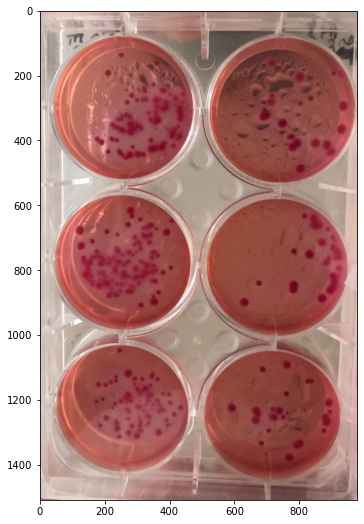

In [3]:
path = r'imagenes\multipozos\1.jpg'
img= cv2.imread(path,1) #original image
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(rgb)
img_detect=img.copy() #circle detected image

In [4]:
img_gray=cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY) # gray image
img_blur=cv2.GaussianBlur(img_gray, (21,21), cv2.BORDER_DEFAULT) #blurry and gray image
all_circs = cv2.HoughCircles( img_blur,cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 180, maxRadius = 220) #circle detection (180,220) plates
all_circs_rounded=np.uint16(np.around(all_circs)) #all values of the circle detection are rounded
print (all_circs_rounded) #x y radius
print (all_circs_rounded.shape)
print (str(all_circs_rounded.shape[1])) #number of circles detected

[[[ 252  782  212]
  [ 730  796  216]
  [ 740  314  217]
  [ 248 1242  209]
  [ 254  302  219]
  [ 714 1258  211]]]
(1, 6, 3)
6


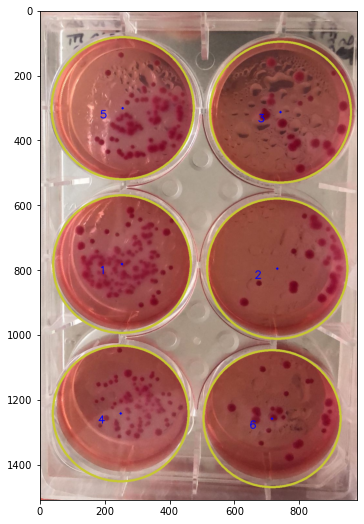

In [5]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_detect, (i[0],i[1]), i[2], (50,200,200), 5) #outline of circle detected
    cv2.circle(img_detect, (i[0], i[1]),2 ,(255,0,0), 3)
    cv2.putText(img_detect, "" + str(count), (i[0]-70, i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (255,0,0), 2)
    count+=1
#cv2.imwrite('circle_detected.jpg',img_detect)

rgb = cv2.cvtColor(img_detect, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(rgb)

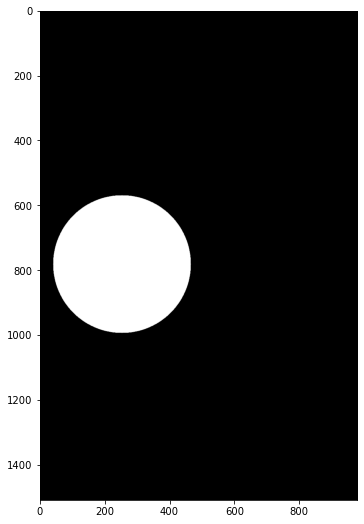

In [6]:
x, y, r = all_circs_rounded[0][0]
#print (x, y, r)
mask= np.zeros_like(img)
mask = cv2.circle(mask, (x,y), r, (255,255,255), -1)
#cv2.imwrite('mask.jpg', mask)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(mask)

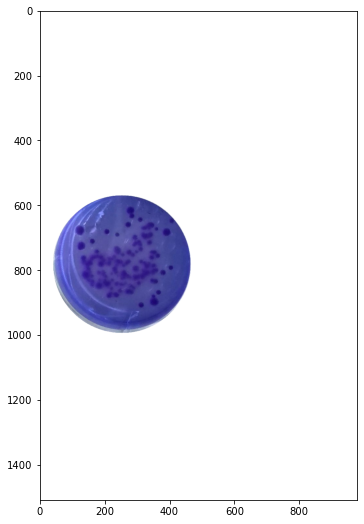

In [7]:
result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask[:,:,0]
#cv2.imwrite('circle_mask.png', result)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(result)

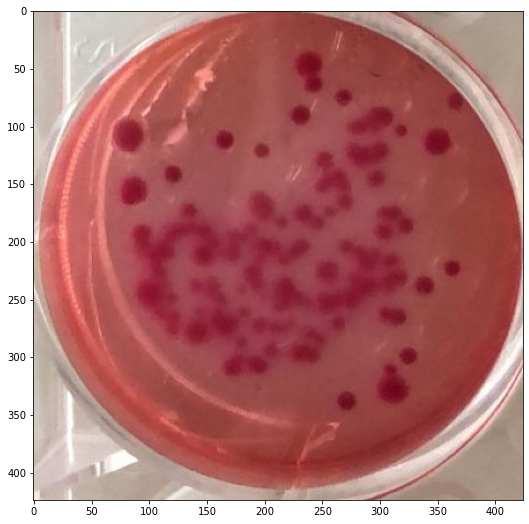

In [8]:
rectX = (x - r) 
rectY = (y - r)
crop_img = result[rectY:(rectY+2*r), rectX:(rectX+2*r)] #crooping 
#cv2.imwrite('crop_img.jpg',crop_img)

rgb = cv2.cvtColor(crop_img , cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(rgb)

<H1> Segmentación de multipozos (Recorte de todos los pozos de todos los multipozos y colocados en su carpeta respectiva)

In [9]:
#carpeta imagenes\final
multiplates=1 # por ahora \multiplate_1 ya que es el unico que tiene muestras en \images
samples=3 #carpeta \images colocar numero de muestras
#ver carpeta

#Codigo de recorte de cada muestra de multipozo y segmentarlo en su carpeta respectiva
#este codigo es el que se usara para el recorte y segmentacion de circulos

In [10]:
multiplate_flag=0
sample_flag=0

for multiplate_flag in range(multiplates):
    
    path = r'imagenes\final' #ubicacion de la carpeta de la imagenes tomadas por la camara
    path= path+'\multiplate_'+str(multiplate_flag+1) #multipozo 1, 2 o 3
    
    for sample_flag in range(samples):
        
        image=path+'\images\sample_'+str(sample_flag+1)+'.jpg' #que muestra se esta trabajando
        print(image)
        
        #procesamiento para la dateccion de multipozos
        img= cv2.imread(image,1) #original image
        img_detect=img.copy() #circle detected image
        img_gray=cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY) # gray image
        img_blur=cv2.GaussianBlur(img_gray, (21,21), cv2.BORDER_DEFAULT) #blurry and gray image
        
        #deteccion
        all_circs = cv2.HoughCircles( img_blur,cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 180, maxRadius = 220) #circle detection (180,220) plates
        all_circs_rounded=np.uint16(np.around(all_circs)) #all values of the circle detection are rounded
        #datos
        print (all_circs_rounded) #x y r
        print (all_circs_rounded.shape)
        count=all_circs_rounded.shape[1] #6
        print (str(all_circs_rounded.shape[1])) #number of circles detected
        
        
        for plate in range(count):
            
            folderName = path+'\plate_'+str(plate+1) #carpeta donde se guardara cada imagen recortada en su plato respectivo
            print(folderName)
            #os.chdir(folderName) #!! verificar este comando
            
            x, y, r = all_circs_rounded[0][plate] #dimensiones de dicho plato
            print (x, y, r)
            
            #procesamiento de recorte
            mask= np.zeros_like(img)
            mask = cv2.circle(mask, (x,y), r, (255,255,255), -1)
            result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
            result[:, :, 3] = mask[:,:,0]
            rectX = (x - r) 
            rectY = (y - r)
            crop_img = result[rectY:(rectY+2*r), rectX:(rectX+2*r)] #crooping 
            
            #nombre del archivo sample_#sample_#plate
            name='sample_'+str(sample_flag+1)+'_'+str(plate+1)+'.jpg'
            print(name)
            
            #cv2.imwrite(name,crop_img)

imagenes\final\multiplate_1\images\sample_1.jpg
[[[ 850  426  196]
  [ 416  432  195]
  [ 848  862  193]
  [ 424  862  186]
  [ 428 1276  184]
  [ 844 1276  184]]]
(1, 6, 3)
6
imagenes\final\multiplate_1\plate_1
850 426 196
sample_1_1.jpg
imagenes\final\multiplate_1\plate_2
416 432 195
sample_1_2.jpg
imagenes\final\multiplate_1\plate_3
848 862 193
sample_1_3.jpg
imagenes\final\multiplate_1\plate_4
424 862 186
sample_1_4.jpg
imagenes\final\multiplate_1\plate_5
428 1276 184
sample_1_5.jpg
imagenes\final\multiplate_1\plate_6
844 1276 184
sample_1_6.jpg
imagenes\final\multiplate_1\images\sample_2.jpg
[[[ 848  828  206]
  [ 842  368  211]
  [ 402 1292  202]
  [ 374  380  208]
  [ 852 1278  197]
  [ 404  836  214]]]
(1, 6, 3)
6
imagenes\final\multiplate_1\plate_1
848 828 206
sample_2_1.jpg
imagenes\final\multiplate_1\plate_2
842 368 211
sample_2_2.jpg
imagenes\final\multiplate_1\plate_3
402 1292 202
sample_2_3.jpg
imagenes\final\multiplate_1\plate_4
374 380 208
sample_2_4.jpg
imagenes\final\

<h1>Código de Binarizzación de una imagen</h1>

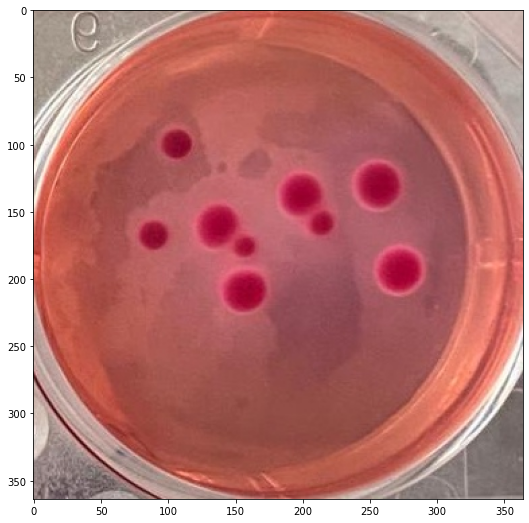

In [11]:
#leer archivo
path=r'imagenes\recortados\22.JPG'
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(rgb)


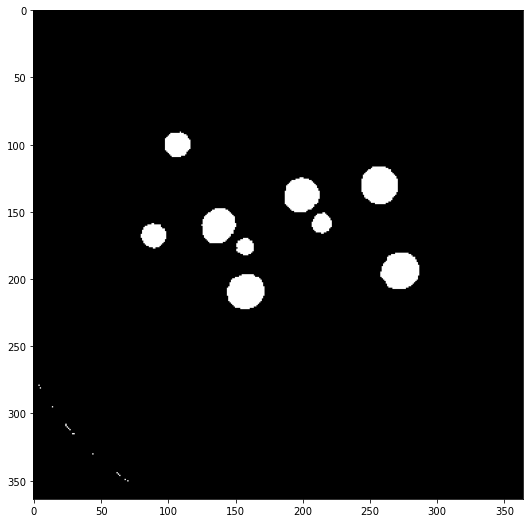

In [12]:
#binarización
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#parametros
lower_range = np.array([160,200,60])
upper_range = np.array([179,255,255])
mask = cv2.inRange(hsv, lower_range, upper_range)
#cv2.imwrite('mask4.jpg',mask)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(mask,cmap='gray')

<H1>Código de detección de colonias bacterianas 

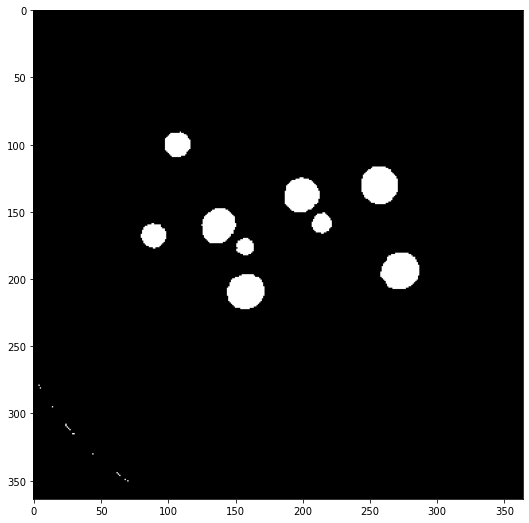

In [13]:
mask_RGB = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
colony_detect=mask_RGB.copy()
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(mask_RGB)

In [14]:
#SCALE
mask_gray=cv2.cvtColor(mask_RGB,	cv2.COLOR_BGR2GRAY) # gray image
mask_blur=cv2.GaussianBlur(mask_gray, (21,21), cv2.BORDER_DEFAULT) #blurry and gray image

#DETECTION
all_circs = cv2.HoughCircles( mask_blur,cv2.HOUGH_GRADIENT, 1, 10, param1 = 50, param2 = 10, minRadius = 0, maxRadius = 20) 
all_circs_rounded=np.uint16(np.around(all_circs)) #all values of the circle detection are rounded
print (all_circs_rounded) #x y radius
print (all_circs_rounded.shape)
print (str(all_circs_rounded.shape[1])) #number of circles detected

[[[272 194  13]
  [256 130  13]
  [156 210  12]
  [200 138  12]
  [ 90 168   8]
  [138 160  12]
  [106 100   8]
  [156 176   6]
  [214 158   6]]]
(1, 9, 3)
9


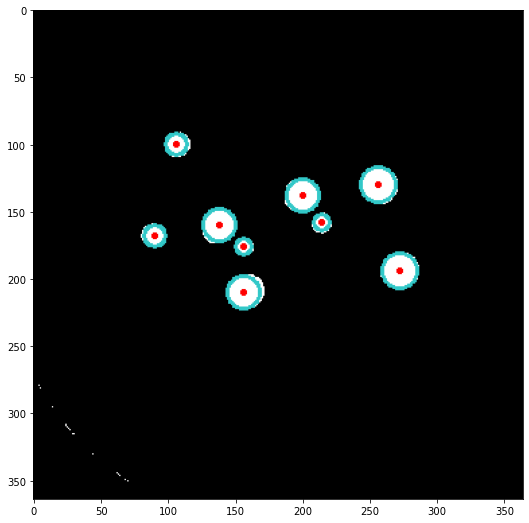

In [15]:
#count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(colony_detect, (i[0],i[1]), i[2], (50,200,200), 2) #outline of circle detected
    cv2.circle(colony_detect, (i[0], i[1]),1 ,(255,0,0), 2)
    #cv2.putText(colony_detect, "" + str(count), (i[0]-30, i[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    #count+=1
    
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(colony_detect)
#colony_detect = cv2.cvtColor(colony_detect, cv2.COLOR_RGB2BGR)
#cv2.imwrite('circle_detected.jpg',colony_detect)

<H1> Deteccíon de colonias para un cantidad x de imagenes en una carpeta y guardado en otra carpeta

In [16]:
num_max=57 #numero a cambiar (en la carpeta hay 66 muestras)

In [17]:
num=0
cont=1
for num in range(num_max):
    
    path1= r'imagenes\recortados\ '
    path1=path1[:-1]+str(num+1)+'.jpg'
    print(path1)
    
    img = cv2.imread(path1)
    #Solo para mostrar
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_range = np.array([160,200,60])#[160,200,60]
    upper_range = np.array([179,255,255])#[179,255,255]
    mask = cv2.inRange(hsv, lower_range, upper_range)

    mask_RGB = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    colony_detect=mask_RGB.copy()

    #SCALE
    mask_gray=cv2.cvtColor(mask_RGB,	cv2.COLOR_BGR2GRAY) # gray image
    mask_blur=cv2.GaussianBlur(mask_gray, (21,21), cv2.BORDER_DEFAULT) #blurry and gray image

    #DETECTION
    all_circs = cv2.HoughCircles( mask_blur,cv2.HOUGH_GRADIENT, 1, 10, param1 = 50, param2 = 10, minRadius = 0, maxRadius = 20) 
    all_circs_rounded=np.uint16(np.around(all_circs)) #all values of the circle detection are rounded
    print (all_circs_rounded) #x y radius
    print (all_circs_rounded.shape)
    print (str(all_circs_rounded.shape[1])) #number of circles detected

    for i in all_circs_rounded[0, :]:
        cv2.circle(colony_detect, (i[0],i[1]), i[2], (50,200,200), 2) #outline of circle detected
        cv2.circle(colony_detect, (i[0], i[1]),1 ,(255,0,0), 2)
    
    colony_detect = cv2.cvtColor(colony_detect, cv2.COLOR_RGB2BGR)
    
    path2=r'imagenes\deteccion'
    print(path2)
    #os.chdir(path2)
    
    name='colony_detection_'
    name=name+str(cont)+'.jpg'
    cont=cont+1
    print(name)
    #cv2.imwrite(name,colony_detect)

imagenes\recortados\1.jpg
[[[380 282  10]
  [316 172  10]
  [354 308  11]
  [114 320   9]
  [336  78  13]
  [266 268  12]
  [266 278  10]
  [354 134   5]
  [160 262   6]
  [386 244   9]
  [268 162   5]
  [356  60  19]
  [328  62   7]
  [300  54   4]]]
(1, 14, 3)
14
imagenes\deteccion
colony_detection_1.jpg
imagenes\recortados\2.jpg
[[[278 392  10]
  [224 252  10]
  [168 226  15]
  [268 314  10]
  [254 324  10]
  [276 108   6]
  [408 270   5]
  [362 320   8]
  [326 312   6]
  [372 338   5]
  [248 292   7]
  [168 212   6]
  [412 196   4]
  [186 186   4]]]
(1, 14, 3)
14
imagenes\deteccion
colony_detection_2.jpg
imagenes\recortados\3.jpg
[[[232  86   8]
  [142 120   5]
  [194  98   5]
  [260 134   4]
  [252 102   5]
  [276 104   4]
  [284 132   7]
  [234 152   5]
  [206  14   4]
  [224 158   4]
  [304  94   4]
  [194 108   5]
  [322 104   4]
  [154 166   4]
  [162 122   3]]]
(1, 15, 3)
15
imagenes\deteccion
colony_detection_3.jpg
imagenes\recortados\4.jpg
[[[244 290  10]
  [320 252  14]
  